In [1]:
import pandas as pd
import numpy as np
import swifter

In [2]:
cars = pd.read_csv("cars_train.csv")
cars.head()



,Id,city,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather,price
0,559327,baltimore,2006.0,NaN,Scion tc,excellent,4 cylinders,gas,190000.0,clean,...,blue,39.287000,-76.647600,24510.0,Baltimore City,24.0,MD,Maryland,56.0,3200
1,1429566,carbondale,2018.0,dodge,charger sxt,NaN,NaN,gas,NaN,clean,...,NaN,37.720000,-89.215800,17077.0,Jackson,17.0,IL,Illinois,48.0,30620
2,931606,thumb,1997.0,ford,f 250 2 wheel dr pickup,fair,NaN,gas,NaN,clean,...,white,43.483300,-83.383500,26157.0,Tuscola,26.0,MI,Michigan,45.0,1800
3,1265412,laredo,2003.0,ram,NaN,NaN,8 cylinders,gas,NaN,clean,...,NaN,27.850069,-99.668883,48479.0,Webb,48.0,TX,Texas,67.0,4500
4,1133731,ocala,2000.0,dodge,1500,NaN,NaN,gas,NaN,clean,...,NaN,29.165000,-81.539900,12069.0,Lake,12.0,FL,Florida,65.0,1400


In [3]:
cars.dtypes

Id                int64
city             object
year            float64
manufacturer     object
make             object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
lat             float64
long            float64
county_fips     float64
county_name      object
state_fips      float64
state_code       object
state_name       object
weather         float64
price             int64
dtype: object

In [4]:
"""cars.drop('manufacturer', axis=1, inplace=True)
cars.drop('make', axis=1, inplace=True)
cars.drop('condition', axis=1, inplace=True)
cars.drop('title_status', axis=1, inplace=True)
cars.drop('transmission', axis=1, inplace=True)
cars.drop('drive', axis=1, inplace=True)
cars.drop('size', axis=1, inplace=True)
cars.drop('type', axis=1, inplace=True)
cars.drop('paint_color', axis=1, inplace=True)
cars.drop('state_code', axis=1, inplace=True)
cars.drop('state_name', axis=1, inplace=True)
cars.drop('county_name', axis=1, inplace=True)
cars.drop('city', axis=1, inplace=True)
cars.drop('county_fips', axis=1, inplace=True)
cars.drop('state_fips', axis=1, inplace=True)
cars.drop('Id', axis=1, inplace=True)
cars.drop('odometer', axis=1, inplace=True)"""

"cars.drop('manufacturer', axis=1, inplace=True)\ncars.drop('make', axis=1, inplace=True)\ncars.drop('condition', axis=1, inplace=True)\ncars.drop('title_status', axis=1, inplace=True)\ncars.drop('transmission', axis=1, inplace=True)\ncars.drop('drive', axis=1, inplace=True)\ncars.drop('size', axis=1, inplace=True)\ncars.drop('type', axis=1, inplace=True)\ncars.drop('paint_color', axis=1, inplace=True)\ncars.drop('state_code', axis=1, inplace=True)\ncars.drop('state_name', axis=1, inplace=True)\ncars.drop('county_name', axis=1, inplace=True)\ncars.drop('city', axis=1, inplace=True)\ncars.drop('county_fips', axis=1, inplace=True)\ncars.drop('state_fips', axis=1, inplace=True)\ncars.drop('Id', axis=1, inplace=True)\ncars.drop('odometer', axis=1, inplace=True)"

In [5]:
cars.dtypes

Id                int64
city             object
year            float64
manufacturer     object
make             object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
lat             float64
long            float64
county_fips     float64
county_name      object
state_fips      float64
state_code       object
state_name       object
weather         float64
price             int64
dtype: object

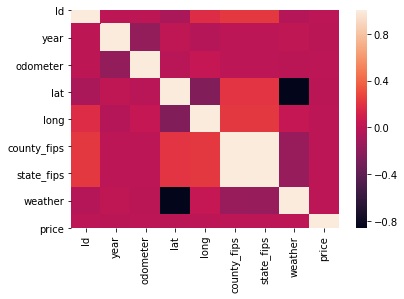

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr = cars.corr()
sns.heatmap(corr);

In [7]:
cars.cylinders.unique()

array(['4 cylinders', nan, '8 cylinders', '6 cylinders', 'other',
       '3 cylinders', '5 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [8]:
cars['cylinders'] = cars['cylinders'].map({'other': 0, 
                                           '3 cylinders': 3, 
                                           '4 cylinders': 4, 
                                           '5 cylinders': 5, 
                                           '6 cylinders': 6, 
                                           '8 cylinder': 8, 
                                           '10 cylinders': 10, 
                                           '12 cylinders': 12})
cars['fuel'] = cars['fuel'].map({'other': 0, 
                                 'gas': 1, 
                                 'diesel': 2, 
                                 'hybrid': 3,
                                 'electric': 4})
cars['condition'] = cars['condition'].map({'salvage': 0, 
                                           'fair': 1, 
                                           'good': 2, 
                                           'like new': 3, 
                                           'excellent': 4, 
                                           'new': 5})

cars.head()

,Id,city,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather,price
0,559327,baltimore,2006.0,NaN,Scion tc,4.0,4.0,1.0,190000.0,clean,...,blue,39.287000,-76.647600,24510.0,Baltimore City,24.0,MD,Maryland,56.0,3200
1,1429566,carbondale,2018.0,dodge,charger sxt,NaN,NaN,1.0,NaN,clean,...,NaN,37.720000,-89.215800,17077.0,Jackson,17.0,IL,Illinois,48.0,30620
2,931606,thumb,1997.0,ford,f 250 2 wheel dr pickup,1.0,NaN,1.0,NaN,clean,...,white,43.483300,-83.383500,26157.0,Tuscola,26.0,MI,Michigan,45.0,1800
3,1265412,laredo,2003.0,ram,NaN,NaN,NaN,1.0,NaN,clean,...,NaN,27.850069,-99.668883,48479.0,Webb,48.0,TX,Texas,67.0,4500
4,1133731,ocala,2000.0,dodge,1500,NaN,NaN,1.0,NaN,clean,...,NaN,29.165000,-81.539900,12069.0,Lake,12.0,FL,Florida,65.0,1400


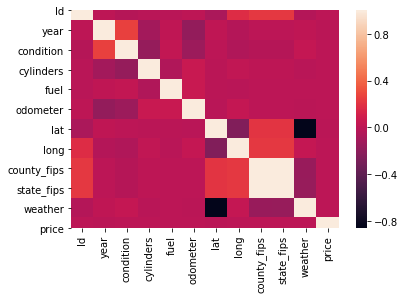

In [9]:
corr = cars.corr()
sns.heatmap(corr);

In [10]:
cars = cars.dropna()

cars.head()

,Id,city,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather,price
21,646472,redding,1997.0,chevrolet,blazer,2.0,6.0,1.0,180000.0,lien,...,white,40.447664,-122.298730,6089.0,Shasta,6.0,CA,California,59.0,1000
23,1429295,carbondale,2014.0,chevrolet,cruze,4.0,4.0,1.0,66344.0,clean,...,red,38.584848,-89.985587,17163.0,St. Clair,17.0,IL,Illinois,48.0,211
32,504420,maine,2002.0,nissan,xterra,1.0,6.0,1.0,150000.0,missing,...,red,43.695192,-70.351646,23005.0,Cumberland,23.0,ME,Maine,44.0,500
36,258558,cleveland,2014.0,cadillac,elr,2.0,4.0,3.0,55800.0,clean,...,silver,41.298474,-81.459900,39153.0,Summit,39.0,OH,Ohio,49.0,27950
46,413465,fargo,2005.0,buick,teraza,2.0,6.0,1.0,208.0,clean,...,brown,46.883894,-96.882838,38017.0,Cass,38.0,ND,North Dakota,38.0,1975


In [11]:
from sklearn.model_selection import train_test_split

X = cars[['year', 'lat', 'long', 'weather', 'cylinders', 'fuel']]
y = cars[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42296, 6)

(18128, 6)

(42296, 1)

(18128, 1)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

#clf = RandomForestClassifier()
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# print('accuracy %s' % accuracy(y_pred, y_test))
# print(classification_report(y_test, y_pred))

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


-0.005062288925481884

In [13]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
reg.score(X, y)

4.270985908128022e-05

In [14]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)

print("Mean Squared error: %.2f"
     % mean_squared_error(y_test, y_pred))

print('Variance score: %2.f' % r2_score(y_test, y_pred))

Coefficients: 
 [[-4536.39572693  2650.57002447  2030.51854072 -2792.44185874
  10952.42235695 -2278.95741912]]
Mean Squared error: 53822420150168.45
Variance score: -0


In [15]:
mean_price = cars.price.mean()
print(mean_price)

45525.320915530254


In [16]:
sub_mean = pd.read_csv('./cars_sample_submission.csv')

sub_mean.head()

,Id,price
0,974298,13631
1,1051884,26256
2,684464,27197
3,1255387,12112
4,1195520,33879


In [17]:
sub_mean['price'] = mean_price

sub_mean.head()

,Id,price
0,974298,45525.320916
1,1051884,45525.320916
2,684464,45525.320916
3,1255387,45525.320916
4,1195520,45525.320916


In [20]:
sub_mean_num = sub_mean.apply(lambda x: pd.to_numeric(x), axis=0)

sub_mean.dtypes



Id         int64
price    float64
dtype: object

In [21]:
sub_mean.to_csv('sub_mean.csv',index=False)
